In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
x = df["Temperature"].values.copy()
y = df["Revenue"].values.copy()
x.shape, y.shape

((500,), (500,))

In [6]:
import matplotlib.pyplot as plt

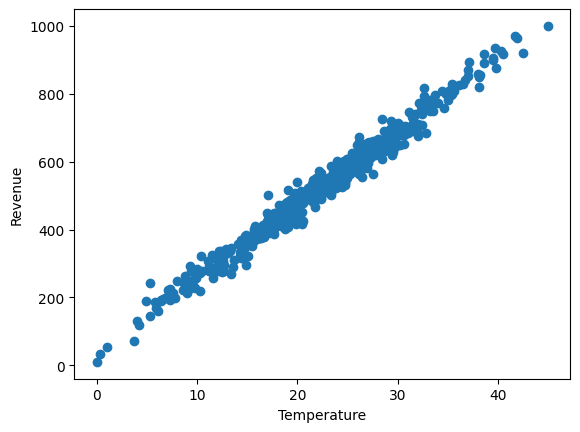

In [7]:
plt.scatter(x,y)
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 50, random_state=42)
x_train.shape, y_train.shape, x_test.shape, x_test.shape

((450,), (450,), (50,), (50,))

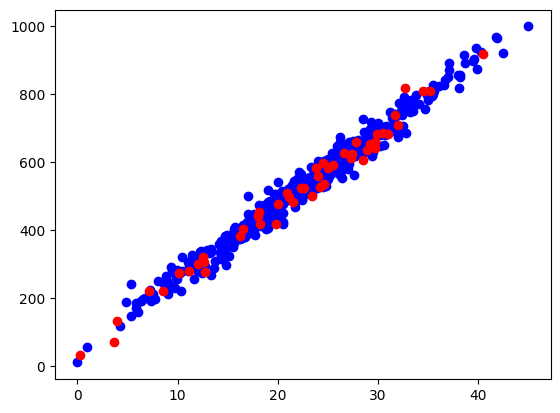

In [11]:
plt.scatter(x_train, y_train, color = 'blue')
plt.scatter(x_test, y_test, color = 'red')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x_train = x_train.reshape(-1,1)
model.fit(x_train, y_train)

LinearRegression()

In [13]:
print("weights", model.coef_)
print("bias", model.intercept_)

weights [21.39757174]
bias 46.49005351495475


In [17]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

print(model.score(x_test.reshape(-1,1), y_test))
y_pred = model.predict(x_test.reshape(-1,1))
print(mae(y_test, y_pred))
print(mse(y_test, y_pred))

0.9836413187360946
18.517514943201704
613.954315134441


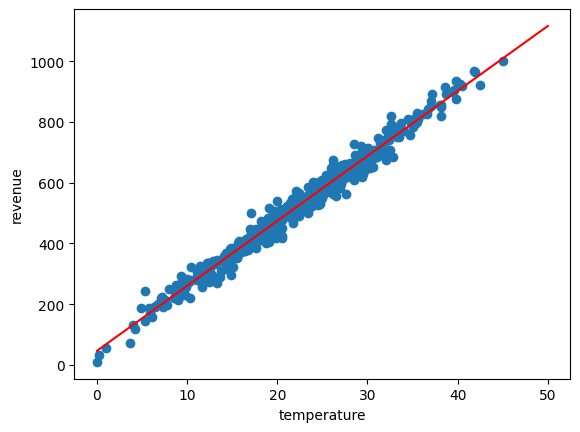

In [19]:
import numpy as np
plt.scatter(x,y)
x_line = np.array([0, 50]).reshape(-1,1)
y_line = model.predict(x_line) 
plt.plot(x_line, y_line, color = 'red')
plt.xlabel('temperature')
plt.ylabel('revenue')
plt.show()

In [ ]:
import pickle 
filename = 'model.pickle'
pickle.dump(model, open(filename, "wb"))